In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy as SP
import random
import csv
import numpy as np

/var/folders/m3/g64fzx5j3q78yt5zp2gc8czr0000gn/T/ipykernel_94090/4258865026.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('RdYlGn_r')
/var/folders/m3/g64fzx5j3q78yt5zp2gc8czr0000gn/T/ipykernel_94090/4258865026.py:27: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  config = SP.array(initialState)
/var/folders/m3/g64fzx5j3q78yt5zp2gc8czr0000gn/T/ipykernel_94090/4258865026.py:28: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  nextConfig = SP.zeros([height, width])


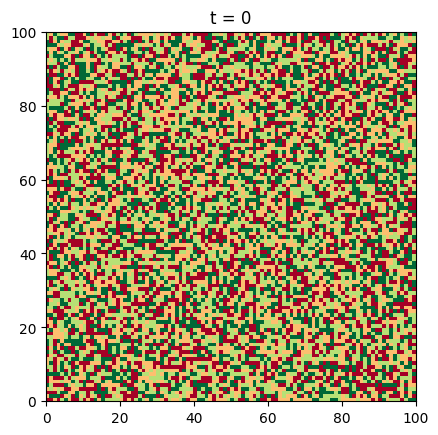

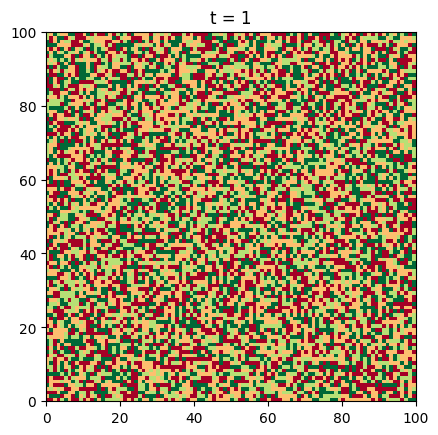

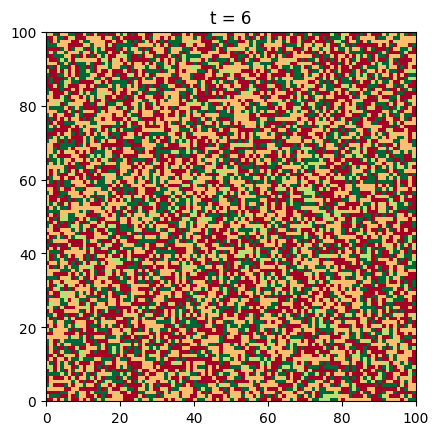

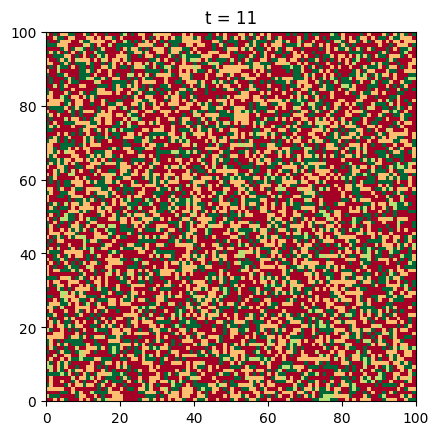

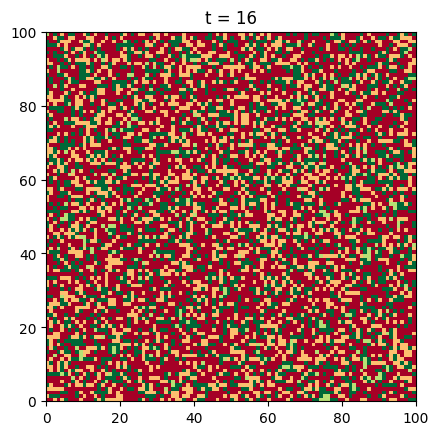

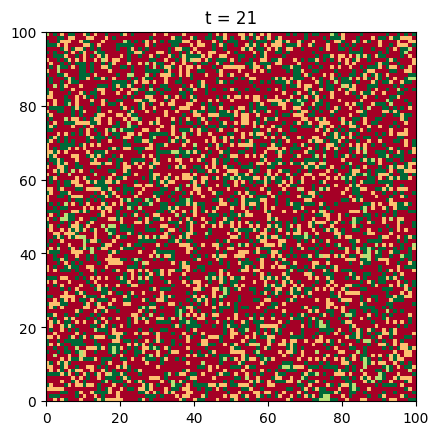

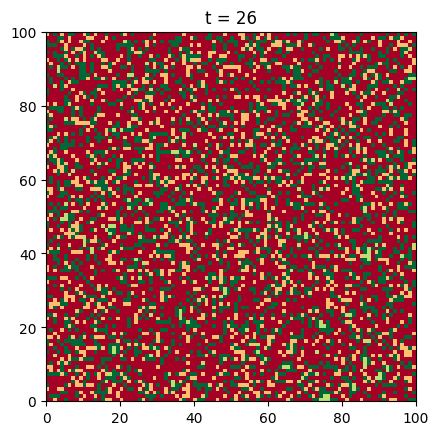

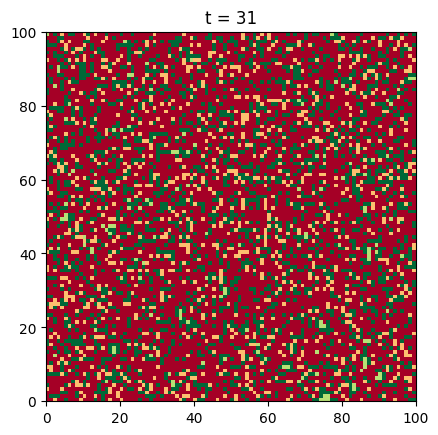

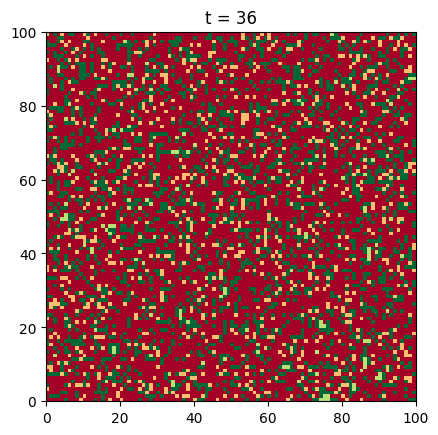

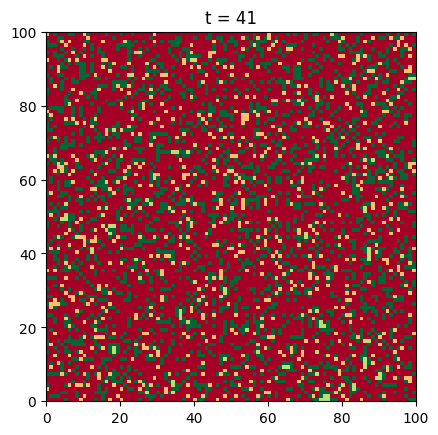

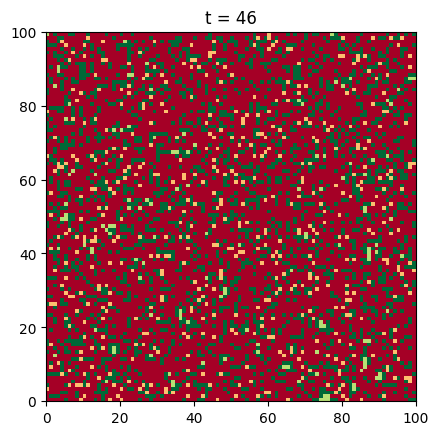

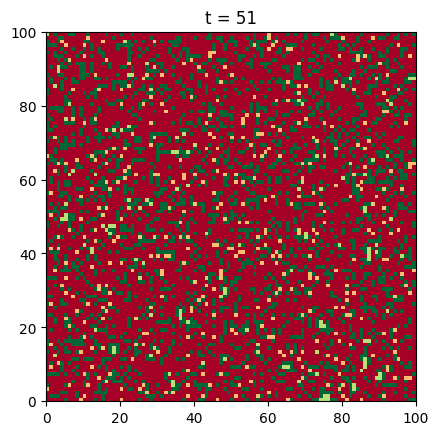

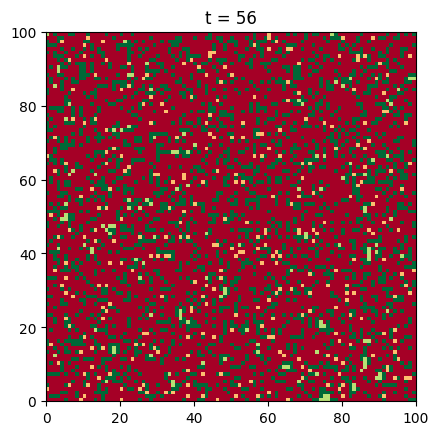

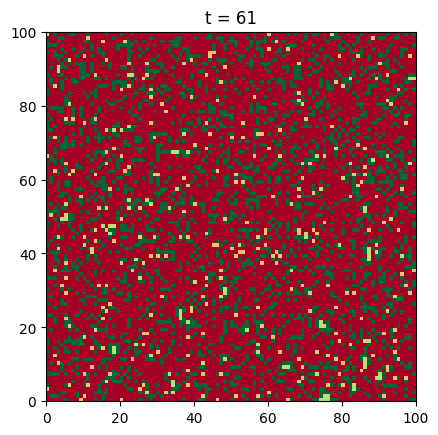

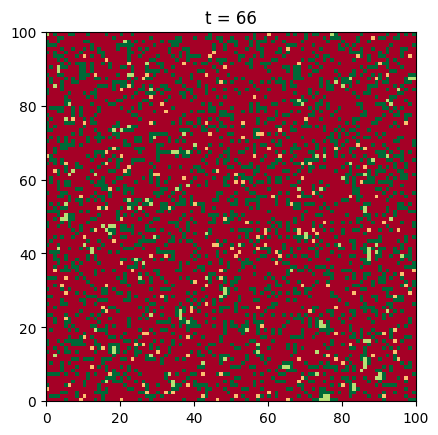

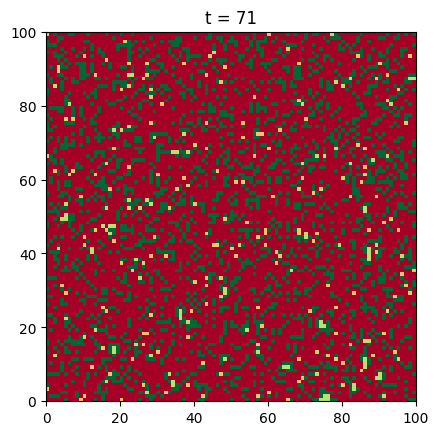

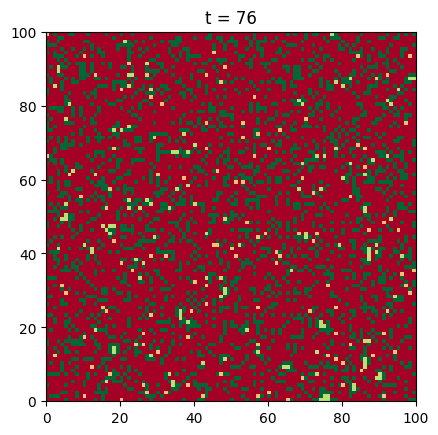

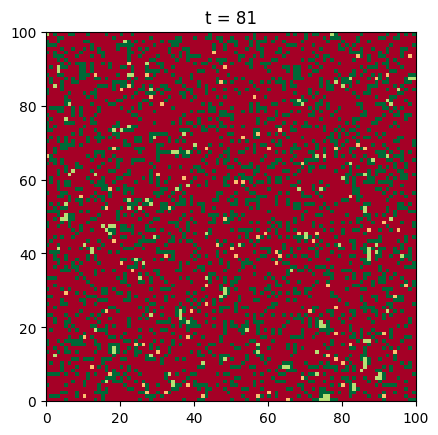

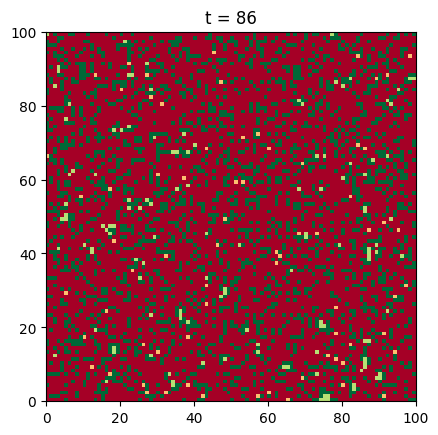

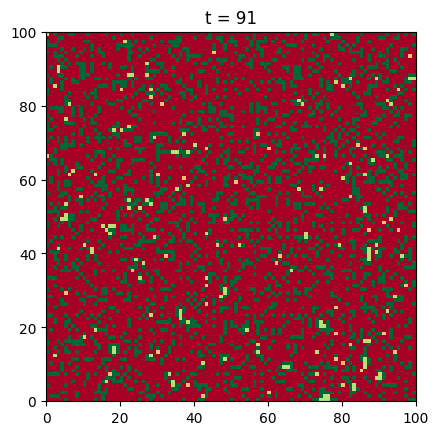

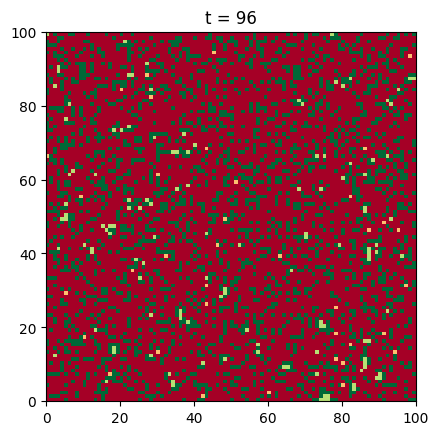

<Figure size 640x480 with 0 Axes>

In [2]:
# State definitions
empty, susceptible, infected, immune =  0, 1, 2, 3


width = 100
height = 100
infectionRate = 0.1
recoveryRate = 0.05

cmap_reversed = plt.cm.get_cmap('RdYlGn_r')

# Read initial states from a CSV file
def readInitialState(filePath):
    initialState = []
    with open(filePath, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            initialState.append(list(map(int, row)))
    return initialState

# Initialize function
def init(filePath):
    global time, config, nextConfig

    time = 0
    initialState = readInitialState(filePath)
    config = SP.array(initialState)
    nextConfig = SP.zeros([height, width])

# Step function
def step():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == susceptible:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == infected:
                            if random.random() < infectionRate:
                                state = infected
                                break
            elif state == infected:
                if random.random() < recoveryRate:
                    state = immune

            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

def draw():
    plt.cla()
    plt.pcolor(config, vmin = 0, vmax = 3, cmap = cmap_reversed)
    plt.axis('image')
    plt.title('t = ' + str(time))
    plt.show()

# Example
init('cellular_automaton_initial_state.csv')
draw()
plt.figure()
for i in range(100):
    step()
    if (i % 5) == 0:
        draw()
        plt.figure()


/var/folders/m3/g64fzx5j3q78yt5zp2gc8czr0000gn/T/ipykernel_94090/4258865026.py:27: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  config = SP.array(initialState)
/var/folders/m3/g64fzx5j3q78yt5zp2gc8czr0000gn/T/ipykernel_94090/4258865026.py:28: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  nextConfig = SP.zeros([height, width])


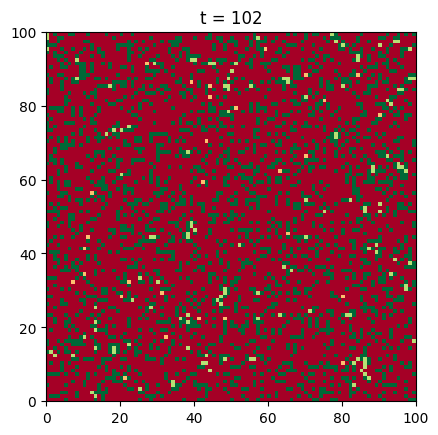

In [3]:
# Modify the draw function for animation
def update(frame):
    step()
    plt.cla()
    plt.pcolor(config, vmin=0, vmax=3, cmap=cmap_reversed)
    plt.axis('image')
    plt.title('t = ' + str(time))

init('cellular_automaton_initial_state.csv')
fig, ax = plt.subplots()  # Create a figure and axis object for the plot

ani = FuncAnimation(fig, update, frames=100, repeat=False)

# To display the animation in a Jupyter notebook, use IPython.display.HTML
from IPython.display import HTML
HTML(ani.to_jshtml())  # Renders the animation as HTML5 video

/var/folders/m3/g64fzx5j3q78yt5zp2gc8czr0000gn/T/ipykernel_94090/3797754914.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = plt.cm.get_cmap('RdYlGn_r')


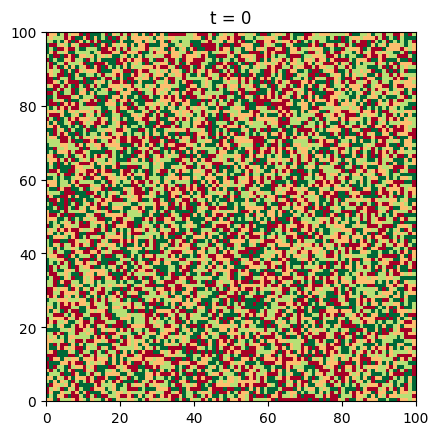

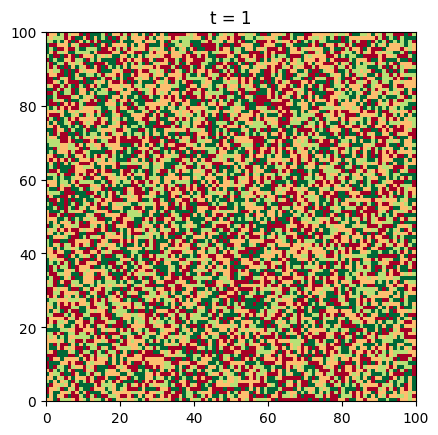

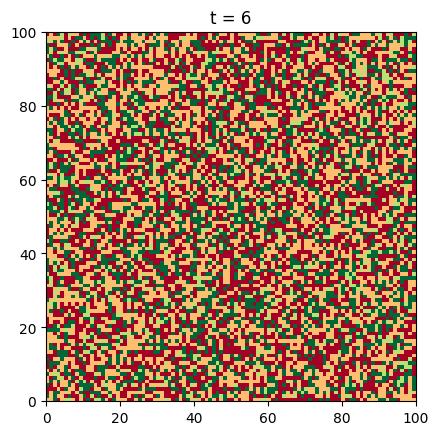

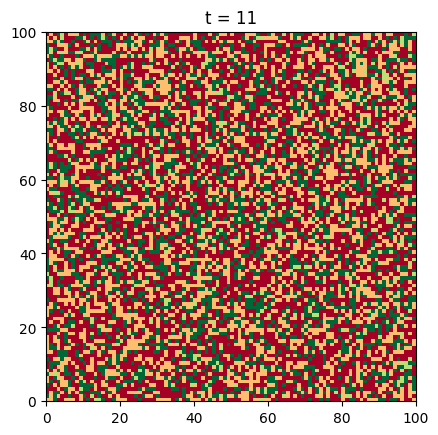

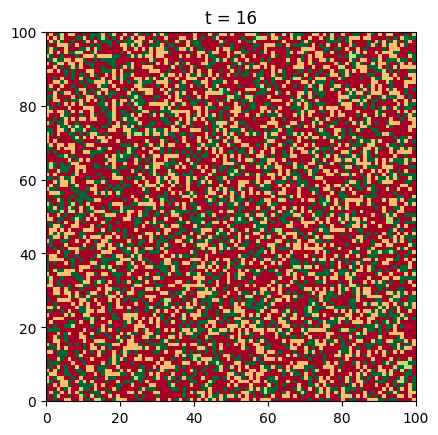

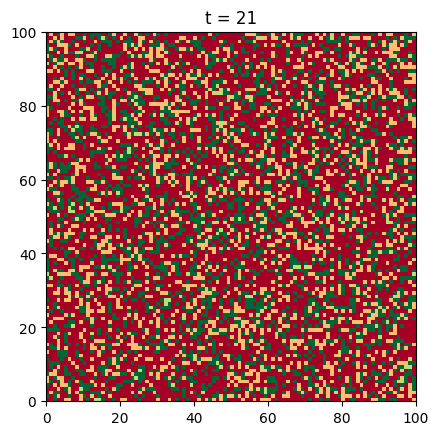

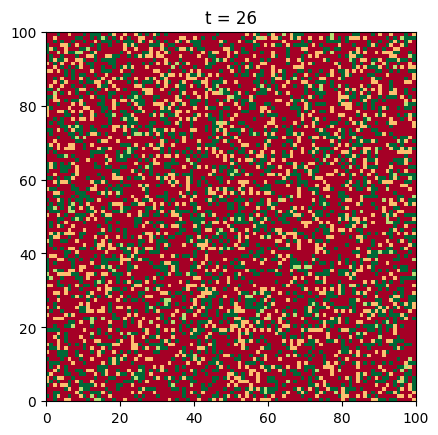

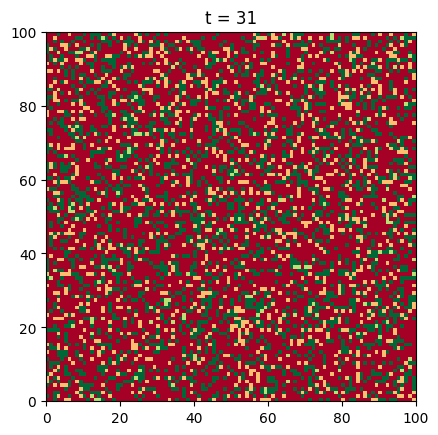

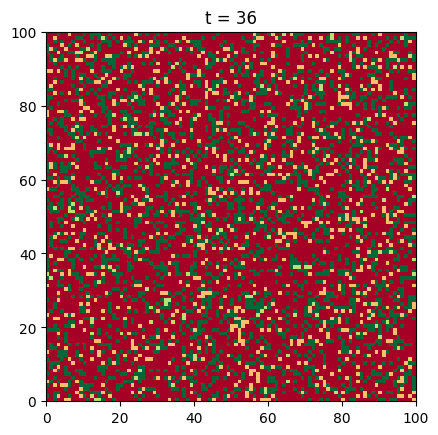

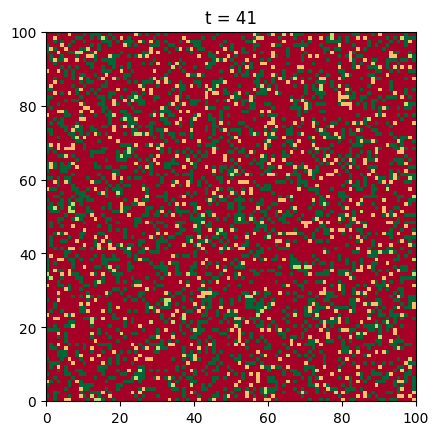

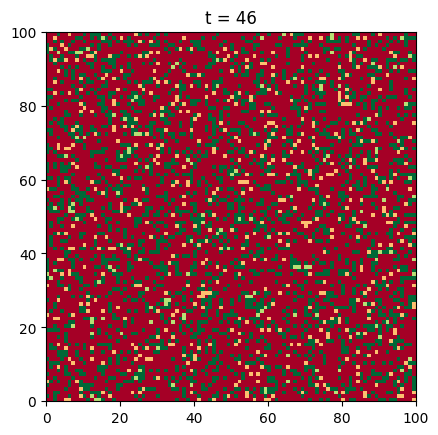

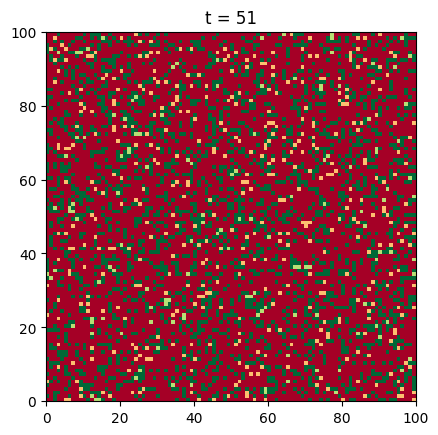

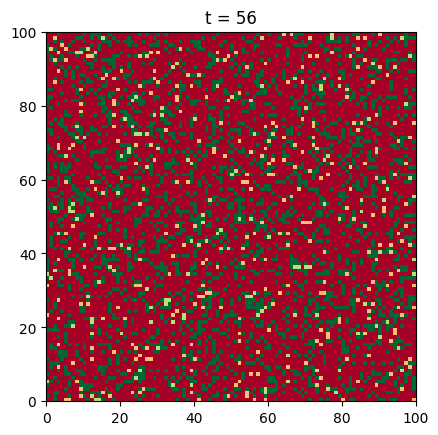

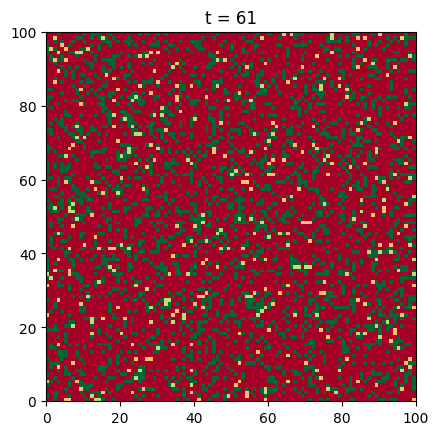

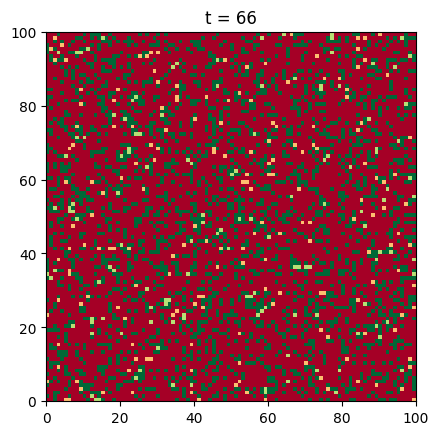

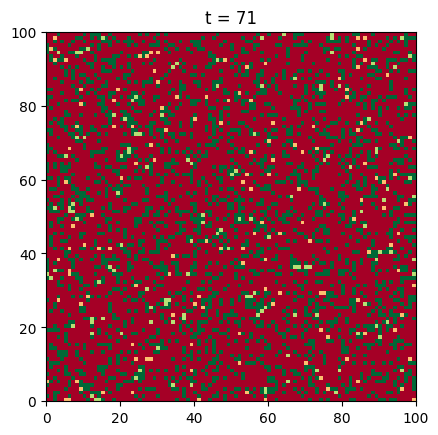

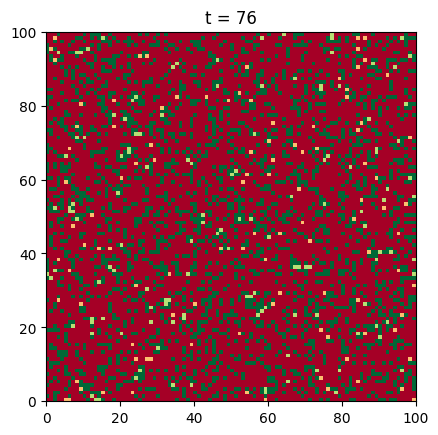

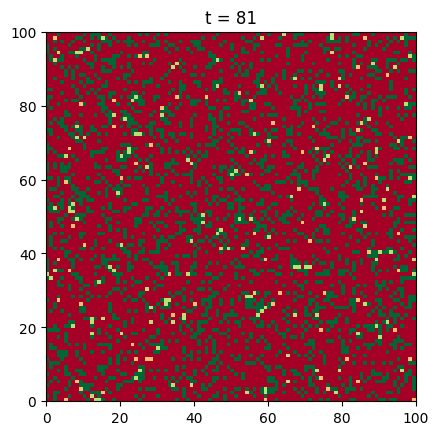

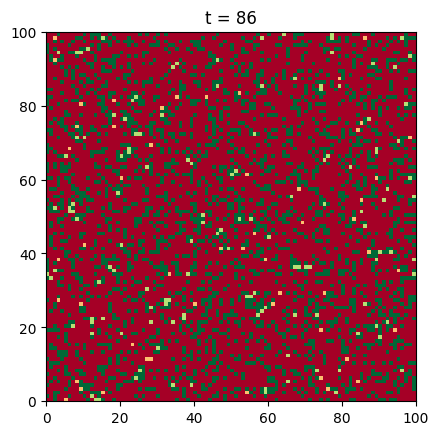

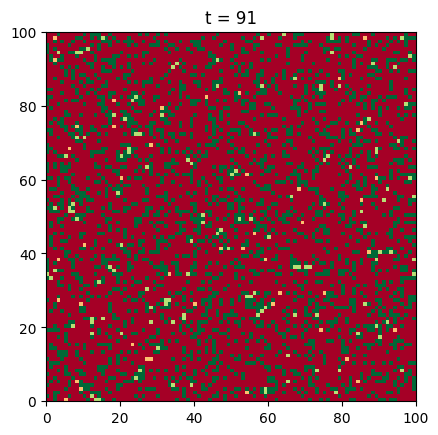

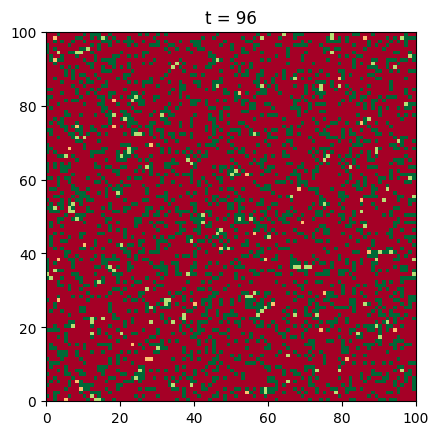

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import random
import csv
import numpy as np  # Using numpy for array operations

# State definitions
empty, healthy, infected, dead = -1, 0, 1, 2

width = 100
height = 100
infectionRate = 0.1
recoveryRate = 0.05

cmap_reversed = plt.cm.get_cmap('RdYlGn_r')

# Read initial states from a CSV file
def readInitialState(filePath):
    initialState = []
    with open(filePath, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            # Set invalid values to empty (-1)
            validated_row = [int(cell) if -1 <= int(cell) <= 2 else -1 for cell in row]
            initialState.append(validated_row)
    return initialState

# Initialize function
def init(filePath):
    global time, config, nextConfig

    time = 0
    initialState = readInitialState(filePath)
    config = np.array(initialState)
    nextConfig = np.full([height, width], -1)  # Initialize with empty state

# Step function
def step():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == healthy:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == infected:
                            if random.random() < infectionRate:
                                state = infected
                                break
            elif state == infected:
                if random.random() < recoveryRate:
                    state = dead

            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

def draw():
    plt.cla()
    plt.pcolor(config, vmin=-1, vmax=2, cmap=cmap_reversed)
    plt.axis('image')
    plt.title('t = ' + str(time))
    plt.show()

# Example
init('cellular_automaton_covid_model.csv')
draw()
plt.figure()
for i in range(100):
    step()
    if (i % 5) == 0:
        draw()
        plt.figure()


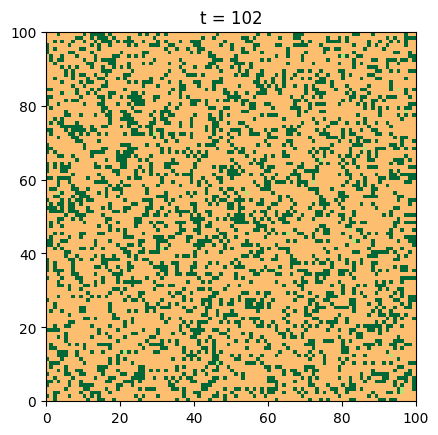

In [5]:
# Modify the draw function for animation
def update(frame):
    step()
    plt.cla()
    plt.pcolor(config, vmin=0, vmax=3, cmap=cmap_reversed)
    plt.axis('image')
    plt.title('t = ' + str(time))

init('cellular_automaton_covid_model.csv')
fig, ax = plt.subplots()  # Create a figure and axis object for the plot

ani = FuncAnimation(fig, update, frames=100, repeat=False)

# To display the animation in a Jupyter notebook, use IPython.display.HTML
from IPython.display import HTML
HTML(ani.to_jshtml())  # Renders the animation as HTML5 video